# Intro to PyTorch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1) Single Layer NN

In [5]:
x = torch.randn((1,5))

w = torch.randn_like(features)

b = torch.randn(1,1)

In [4]:
def activation(x):
    sigm = 1 / (1+ torch.exp(-x))
    return sigm

In [6]:
y = torch.mm(x,w) + b

RuntimeError: size mismatch, m1: [1 x 5], m2: [1 x 5] at c:\new-builder_3\win-wheel\pytorch\aten\src\th\generic/THTensorMath.cpp:2070

In [11]:
y = torch.mm(x, w.view(5,1)) + b
y = activation(y)
y

tensor([[0.0857]])

### 2) Multi Layer NN 

In [12]:
input_units = 3
hidden_units = 2
output_units = 1

In [15]:
x = torch.randn((1,3))

wt_i_to_h = torch.randn((3,2)) # from 3 to 2

wt_h_to_o = torch.randn((2,1)) # from 2 to 1

b1 = torch.randn((1,2)) # dimension = output dimension. in this layer output is hidden layer
b2 = torch.randn((1,1)) # dimension = output dimension. in this layer output is final output

Or, alternatively this can be written as

In [14]:
x = torch.randn((1,3))

wt_i_to_h = torch.randn((input_units, hidden_units)) # from 3 to 2

wt_h_to_o = torch.randn((hidden_units, output_units)) # from 2 to 1

b1 = torch.randn((1, hidden_units)) # dimension = output dimension. in this layer output is hidden layer
b2 = torch.randn((1, output_units)) # dimension = output dimension. in this layer output is final output

In [18]:
y = torch.mm(x, wt_i_to_h) + b1
y = activation(y)
print (y)
y = torch.mm(y, wt_h_to_o) + b2
y = activation(y)
print (y)

tensor([[0.7395, 0.3515]])
tensor([[0.2354]])


### 3) Numpy to Torch and back 

In [22]:
a = np.random.rand(3,4)
a

array([[0.29548943, 0.20578004, 0.59541303, 0.56300916],
       [0.21322573, 0.95975376, 0.78490481, 0.69209327],
       [0.0797586 , 0.34904921, 0.85668013, 0.51683533]])

In [23]:
b = torch.from_numpy(a)
b

tensor([[0.2955, 0.2058, 0.5954, 0.5630],
        [0.2132, 0.9598, 0.7849, 0.6921],
        [0.0798, 0.3490, 0.8567, 0.5168]], dtype=torch.float64)

Memory is shared between the Numpy array and Torch Tensor. If you chagne the value in one place, the other object will change as well

### 4) Neural Network in pytorch using Matrix Multiplication

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

dataset = datasets.MNIST('MNIST_data', download=True, train=True, transform = transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [61]:
# Let's grab the first batch from dataloader
dataiter = iter(dataloader)
images, labels = dataiter.next()
print (type(images))
print (images.shape)
print (labels.shape)

<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [65]:
images.shape[0]

32

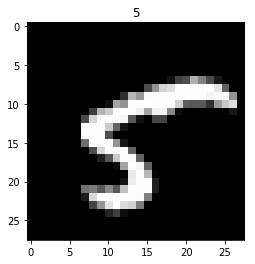

In [64]:
# Plot one image
plt.imshow(images[1].numpy().squeeze(), cmap = 'gray')
plt.title(labels[1].item())
plt.show()

In [72]:
# Build a Fully Connected Neural Network 
input_units = 784 
hidden_units = 256
output_units = 10

# initialize the weights and bias
wt_itoh = torch.randn((input_units, hidden_units))
wt_htoo = torch.randn((hidden_units, output_units))
b1 = torch.randn((1, hidden_units))
b2 = torch.randn((1, output_units))

# define the activation function
def activation(x):
    sig = 1 / (1+ torch.exp(-x))
    return sig

# loop through the dataloader
for images, labels in dataloader:
    batch_size = images.shape[0]
    x = images.view(batch_size, -1)
    h = torch.mm(x, wt_itoh) + b1
    h = activation(h)
    
    out = torch.mm(h, wt_htoo) + b2

    

In [73]:
print (out[1])

tensor([ 14.7878,   2.3423,  -5.5257, -12.6507, -12.7191,   9.5128,  -8.7921,
         -2.0138,  21.4676,  -5.7391])


### 5) Implementing Softmax using Matrix Multiplication

In [ ]:
# From the previous neural network output we see that our values are all over the place. 
# but all we really want is the probability that a particular image is for which label

In [95]:
def softmax(x):
    exp = torch.exp(x)
    print ('exp:', exp)
    exp_sum = torch.sum(exp, dim =1).view(-1,1)
    print ('exp sum: ', exp_sum)
    print ('ratio: ', exp/exp_sum)
    return exp/exp_sum

In [96]:
soft_out = softmax(out[1:3])

exp: tensor([[2.6440e+06, 1.0406e+01, 3.9833e-03, 3.2052e-06, 2.9933e-06, 1.3532e+04,
         1.5193e-04, 1.3347e-01, 2.1051e+09, 3.2176e-03],
        [2.6975e+07, 2.7493e-03, 1.8648e+02, 6.4369e-04, 6.8324e-02, 5.2354e-02,
         2.8376e-01, 2.5758e-03, 8.4367e+06, 1.9572e-03]])
exp sum:  tensor([[2107780992.],
        [  35412328.]])
ratio:  tensor([[1.2544e-03, 4.9367e-09, 1.8898e-12, 1.5206e-15, 1.4201e-15, 6.4199e-06,
         7.2080e-14, 6.3325e-11, 9.9874e-01, 1.5265e-12],
        [7.6175e-01, 7.7637e-11, 5.2659e-06, 1.8177e-11, 1.9294e-09, 1.4784e-09,
         8.0131e-09, 7.2739e-11, 2.3824e-01, 5.5270e-11]])


### 6) Building Neural Network in Pytorch using NN Module

In [100]:
from torch import nn

In [106]:
# Define the Network

class Network (nn.Module):
    def __init__ (self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim =1)
        
    def forward (self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
model = Network()
print (model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


Another way to define the model is to use **Functional**

In [103]:
from torch import nn
import torch.nn.functional as F

In [107]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.sigmoid(x)
        x = self.output(x)
        x = F.softmax(x, dim=1)
        
        return x
model = Network()
print (model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


### 7) Activation Functions

Sigmoid, Tanh, ReLU

### 8) Build a Network Class

Input - hidden(Relu) - hidden(Relu) - output(softmax

In [108]:
from torch import nn
import torch.nn.functional as F

In [109]:
class Network (nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.output(x)
        x = F.softmax(x, dim=1)
        
        return x
model = Network()
print (model)

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


### 9) Training Neural Network - What all we need

Neural Networks with non-linear activations work like universal function approximators. 


It means that Neural Network given the input - can give you the output as you would get from that function. It does this by adjusting the weights of the network. And to adjust the weights, we need to tell the network how good or poor its classification is then it adjusts the weight to minimize the errors. 


For that we define the Loss Function, a measure of our prediction error

### 10) Losses in Pytorch

With Actual scores - CrossEntropyLoss()

with LogSoftMax() - NLLLoss()

With Softmax() - 


For computational reasons, it is better to use actual scores from the model (ie before the softmax()) and then use Crossentropyloss() as loss function


Its better to avoid doing calculations with probabilities, typically we use log-probabilities

### 11) Network with Actual Score and CrossEntropyLoss()

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
# Load Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5), (0.5, 0.5))])

dataset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
dataloader = DataLoader(dataset, shuffle=True, batch_size=32)

In [5]:
# Build the network

model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10))

print (model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

In [7]:
images, labels = next(iter(dataloader))

In [8]:
images

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

In [10]:
# Flatten Images
batch_size = images.shape[0]
images = images.view(batch_size, -1)

In [13]:
# Forward pass
y_pred_score = model(images)
y_pred_score

tensor([[ 0.0102,  0.0931, -0.0154, -0.1406, -0.1265,  0.1085, -0.0415,  0.1916,
          0.0235,  0.0751],
        [ 0.0665,  0.1175,  0.0069, -0.1402, -0.1323,  0.0426, -0.0359,  0.1530,
         -0.0052,  0.1147],
        [-0.0116,  0.1028, -0.0958, -0.2038, -0.0334, -0.0073,  0.0224,  0.1800,
          0.0182,  0.1046],
        [-0.0804,  0.0571, -0.0277, -0.1344, -0.1469,  0.1068, -0.0654,  0.1735,
          0.0226,  0.1350],
        [ 0.0278,  0.0919, -0.0597, -0.1876, -0.0882, -0.0038, -0.0053,  0.1497,
          0.0302,  0.1077],
        [ 0.0185,  0.0344, -0.0106, -0.1635, -0.1386,  0.0712, -0.0829,  0.1499,
          0.0842,  0.0971],
        [-0.0213,  0.0703, -0.0621, -0.1201, -0.0745,  0.0891, -0.0712,  0.1488,
          0.0440,  0.0870],
        [ 0.0123,  0.0833, -0.0750, -0.1550, -0.0891,  0.0321, -0.0149,  0.1608,
          0.0641,  0.0460],
        [ 0.0783,  0.1019, -0.0786, -0.1809, -0.1185,  0.0760, -0.0162,  0.1919,
          0.0854,  0.0508],
        [-0.0681,  

In [16]:
# Calculate loss
loss = loss_fn(y_pred_score, labels)

In [17]:
print (loss)

tensor(2.3267, grad_fn=<NllLossBackward>)


### 12) Network with LogSoftMax() output and NLLLoss()

In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms

In [9]:
# Load Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5), (0.5, 0.5))])

dataset = datasets.MNIST('MNIST_data', download=True, train=True, transform=transform)
dataloader = DataLoader(dataset, shuffle=True, batch_size=32)

In [22]:
# Define the Network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
print (model)

loss_fn = nn.NLLLoss()

images, labels = next(iter(dataloader))
batch_size = images.shape[0]
images = images.view(batch_size, -1)
y_pred_score = model(images)
loss = loss_fn(y_pred_score, labels)
print (loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
tensor(2.3200, grad_fn=<NllLossBackward>)


### 13) Backpropagation - Autograd Module of Pytorch

We have calculated Loss, now we want to use to perform backpropagation

PyTorch keep tracks of all operations on a tensor and calculate the gradients automatically. You just need to set requires_grad = True on a tensor

You can do this by 
1. at the time of creation by using requires_grad keyword
2. at any time with x.requires_grad_(True)


You can turn off gradients for a block of code with torch.no_grad(True)

In [23]:
x = torch.randn(2,2, requires_grad=True)
print (x)

tensor([[-0.2475, -0.0048],
        [ 0.5091, -0.6579]], requires_grad=True)


In [24]:
y = x**2
print (y)

tensor([[0.0613, 0.0000],
        [0.2592, 0.4329]], grad_fn=<PowBackward0>)


In [25]:
## grad_fn shows the function that generated that variable
print (y.grad_fn)

In [27]:
z = y.mean()
print (z)

tensor(0.1883, grad_fn=<MeanBackward1>)


Autograd module keeps track of these operations and knows how to calculate the gradient for each one. 

This way it is able to calculate the gradients for a chain of operations, with respect to any one tensor. 

Let's check the gradient of z wrt to x and y.

In [28]:
print (x.grad)
print (y.grad)

None
None


They are empty currently

**To get the gradients, you need to run .backward() method on a variable z**

In [29]:
z.backward()

In [30]:
print (y.grad)
print (x.grad)

None
tensor([[-0.1238, -0.0024],
        [ 0.2546, -0.3290]])


In [31]:
x/2

tensor([[-0.1238, -0.0024],
        [ 0.2546, -0.3290]], grad_fn=<DivBackward0>)

### 14) Backpropagation - In the Network

In [33]:
# Define the Network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
print (model)

loss_fn = nn.NLLLoss()

images, labels = next(iter(dataloader))
batch_size = images.shape[0]
images = images.view(batch_size, -1)
y_pred_score = model(images)
loss = loss_fn(y_pred_score, labels)
print (loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
tensor(2.3105, grad_fn=<NllLossBackward>)


In [34]:
print ('Before Backward Pass:', model[0].weight.grad)

loss.backward()

print ('After Backward Pass:', model[0].weight.grad)

Before Backward Pass: None
After Backward Pass: tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0077,  0.0077,  0.0077,  ...,  0.0077,  0.0077,  0.0077],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


### 15) Gradient Descent - Use gradients to update the weights

In [7]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

The General Process:
1. Make a forward pass
2. Calculate Loss
3. Perform a backward pass, and calculate the gradient
4. Update weights

In [39]:
# Define the Network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
print (model)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()

images, labels = next(iter(dataloader))
batch_size = images.shape[0]
images = images.view(batch_size, -1)

y_pred_score = model(images)
loss = loss_fn(y_pred_score, labels)
print (loss)
loss.backward()
print ('Initial Weights:', model[0].weight)
print ('Gradient :', model[0].weight.grad)
optimizer.step()
print ('Updated Weights:', model[0].weight)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
tensor(2.3324, grad_fn=<NllLossBackward>)
Initial Weights: Parameter containing:
tensor([[-0.0237,  0.0052,  0.0354,  ...,  0.0111, -0.0123,  0.0209],
        [-0.0053,  0.0286, -0.0148,  ...,  0.0028,  0.0038, -0.0026],
        [-0.0322,  0.0104, -0.0107,  ..., -0.0067, -0.0144, -0.0080],
        ...,
        [ 0.0172,  0.0245,  0.0177,  ..., -0.0157, -0.0058, -0.0033],
        [-0.0039,  0.0031,  0.0038,  ..., -0.0255, -0.0087, -0.0281],
        [-0.0177,  0.0288, -0.0099,  ..., -0.0056,  0.0165, -0.0310]],
       requires_grad=True)
Gradient : tensor([[-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        [-0.0048, -0.0048, -0.0048,  ..., -0.0048, -0.0048, -0.0048],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]

In [41]:
print ('Initial Weights:', model[2].weight)
print ('Gradient :', model[2].weight.grad)
optimizer.step()
print ('Updated Weights:', model[2].weight)


Initial Weights: Parameter containing:
tensor([[-0.0028, -0.0445,  0.0812,  ...,  0.0472, -0.0381,  0.0242],
        [-0.0415,  0.0880,  0.0814,  ...,  0.0472,  0.0228,  0.0049],
        [-0.0250,  0.0516, -0.0746,  ..., -0.0188, -0.0483,  0.0529],
        ...,
        [ 0.0819,  0.0199, -0.0302,  ..., -0.0611, -0.0465,  0.0181],
        [-0.0148,  0.0631, -0.0152,  ..., -0.0185,  0.0107, -0.0530],
        [ 0.0714, -0.0170, -0.0176,  ..., -0.0006, -0.0369, -0.0506]],
       requires_grad=True)
Gradient : tensor([[-0.0134,  0.0009,  0.0000,  ..., -0.0003, -0.0064, -0.0027],
        [ 0.0050,  0.0065, -0.0003,  ...,  0.0034, -0.0023,  0.0144],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0020,  0.0013,  0.0000,  ...,  0.0004,  0.0000,  0.0011],
        [ 0.0004,  0.0008, -0.0000,  ...,  0.0050,  0.0041,  0.0055]])
Updated Weights: Parameter containing:
tensor([[-0.0026

### 16) Full Network

In [10]:
# Define the Network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
print (model)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
for e in range(epochs):
    train_loss = 0.0
    for images, labels in dataloader:
        optimizer.zero_grad()
        batch_size = images.shape[0]
        images = images.view(batch_size, -1)
        y_logps = model(images)
        
        loss = loss_fn(y_logps, labels)
        
        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss.item()
    print ('Epochs : {}/{}'.format(e+1, epochs), 'Training Loss :', train_loss)
print ('=================')
print ('Training Completed')

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Epochs : 1/5 Training Loss : 1386.9603231474757
Epochs : 2/5 Training Loss : 598.8843564614654
Epochs : 3/5 Training Loss : 499.0535109117627
Epochs : 4/5 Training Loss : 424.2230636924505
Epochs : 5/5 Training Loss : 361.2712961509824
Training Completed


In [56]:
print (y_logps[0].shape)
print (y_logps[0])
print (labels[0])

torch.Size([10])
tensor([ -5.2827, -10.0863,  -4.4043,  -8.0254,  -8.9314,  -4.0854,  -0.0353,
        -12.2836, -10.1045, -12.5737], grad_fn=<SelectBackward>)
tensor(6)


In [48]:
y_prob = torch.exp(y_logps[0])
y_prob

tensor([5.0788e-03, 4.1648e-05, 1.2224e-02, 3.2703e-04, 1.3217e-04, 1.6816e-02,
        9.6533e-01, 4.6268e-06, 4.0896e-05, 3.4620e-06],
       grad_fn=<ExpBackward>)

In [55]:
y_prob = F.softmax(y_logps[0].view(1,-1), dim=1)
y_prob

tensor([[5.0788e-03, 4.1648e-05, 1.2224e-02, 3.2703e-04, 1.3217e-04, 1.6816e-02,
         9.6533e-01, 4.6268e-06, 4.0896e-05, 3.4620e-06]],
       grad_fn=<SoftmaxBackward>)

In [72]:
print (y_prob.data.shape)
y_prob.data

y_prob.data.numpy()

torch.Size([1, 10])


array([[5.0788242e-03, 4.1647720e-05, 1.2224096e-02, 3.2703453e-04,
        1.3217379e-04, 1.6816357e-02, 9.6533096e-01, 4.6268051e-06,
        4.0895811e-05, 3.4619543e-06]], dtype=float32)

In [59]:
y_pred_prob, y_pred_label = torch.max(y_prob, dim=1)
print (y_pred_prob.item(), y_pred_label)

0.965330958366394 tensor([6])


<BarContainer object of 10 artists>

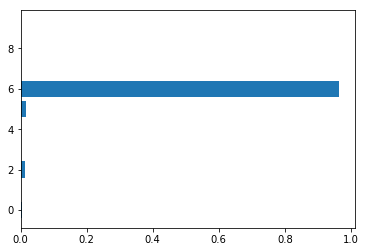

In [74]:
plt.barh(np.arange(10), y_prob.data.numpy().squeeze())

### 17) Full Network - Fashion MNIST

In [75]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch import optim
from torchvision import datasets, transforms

In [80]:
# Load Data
transformations = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5), (0.5, 0.5))])

dataset = datasets.FashionMNIST('FashionMNIST_data', download=True, train=True, transform=transformations)
dataloader = DataLoader(dataset, shuffle=True, batch_size=32)

In [83]:
# Define the Network
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
print (model)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.2 )

epochs = 5
for e in range(epochs):
    train_loss = 0
    for images, labels in dataloader:
        optimizer.zero_grad()
        batch_size =images.shape[0]
        images = images.view(batch_size, -1)
        y_logps = model(images)
        loss = loss_fn(y_logps, labels)
        loss.backward()
        optimizer.step()
        
        train_loss = train_loss + loss.item()
    print (f'Epochs : {e+1}/{epochs}', f'Training Loss : {train_loss}')
print ('=================')
print ('Training Completed')

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Epochs : 1/5 Training Loss : 1046.5547231659293
Epochs : 2/5 Training Loss : 754.2266676723957
Epochs : 3/5 Training Loss : 674.8049216866493
Epochs : 4/5 Training Loss : 626.2559717670083
Epochs : 5/5 Training Loss : 591.371476598084
Training Completed


In [88]:
y_prob = torch.exp(y_logps[0])
print (y_prob.shape)
print (y_prob)

y_pred_prob, y_pred_label = torch.max(y_prob.view(1,-1), dim=1)
print (y_pred_prob, y_pred_label)

torch.Size([10])
tensor([7.7941e-10, 4.5787e-09, 3.3370e-10, 5.7764e-10, 5.7687e-10, 5.9412e-05,
        3.0308e-09, 3.1848e-03, 9.8777e-10, 9.9676e-01],
       grad_fn=<ExpBackward>)
tensor([0.9968], grad_fn=<MaxBackward0>) tensor([9])


In [90]:
print(images[0].shape)

torch.Size([784])


In [94]:
images[0].view(1,28,28).data.numpy()

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , 

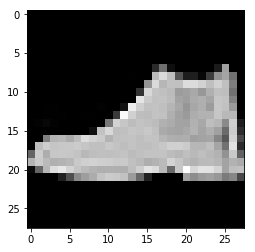

In [98]:
plt.imshow(images[0].view(28,28).data, cmap='gray')
plt.show()

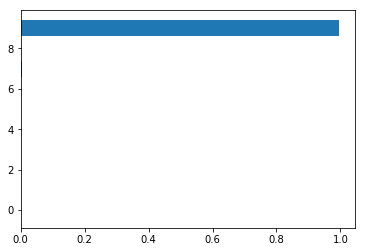

In [100]:
plt.barh(np.arange(10), y_prob.data.numpy())
plt.show()

### 18) Making Predictions and Measuring Accuracy

In [11]:
# Load Data
transformations = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5), (0.5, 0.5))])

# Download the Test Data
testset = datasets.FashionMNIST('FashionMNIST_data', download=True, train=False, transform=transformations)
testloader = DataLoader(testset, shuffle=True, batch_size=32)

In [13]:
images, labels  = next(iter(testloader))
batch_size =images.shape[0]
images = images.view(batch_size, -1)
test_pred = torch.exp(model(images))
print (test_pred.shape)

torch.Size([32, 10])


In [ ]:
test_pred_prob, test_prob_label = torch.max(test_pred, dim=1)
print 

### 19) Regularization - Dropout